# Exploratory notebook for model results

In [1]:
##Imports + read in files
from pipeline import find_best_model
import pandas as pd
import matplotlib.pyplot as plt

reg_df = pd.read_csv('results/reg-small-grid.csv')
clf_df = pd.read_csv('results/clf-small-grid.csv')

# Regression models

In [2]:
reg_summary_df = reg_df.drop(['Unnamed: 0','parameters'],axis=1)
reg_summary_df['mean_RMSE'] = reg_summary_df.groupby(['classifier','split'])['root_mean_squared_error'].transform('mean')
reg_summary_df['mean_r2'] = reg_summary_df.groupby(['classifier','split'])['r2'].transform('mean')
reg_summary_df['mean_explained_variance'] = reg_summary_df.groupby(
    ['classifier','split'])['explained_variance'].transform('mean')
reg_summary_df['mean_mean_squared_error'] = reg_summary_df.groupby(['classifier','split'])['mean_squared_error'].transform('mean')

In [3]:
reg_summary_df = reg_summary_df.drop(['explained_variance','mean_squared_error','r2','root_mean_squared_error'],axis=1)

In [4]:
reg_summary_df = reg_summary_df.drop_duplicates()

In [5]:
reg_summary_df.style.apply(
    find_best_model.highlight_max, color='darkorange', subset=['mean_r2', 'mean_RMSE', 'mean_explained_variance',
                                                              'mean_mean_squared_error'])

,classifier,split,mean_RMSE,mean_r2,mean_explained_variance,mean_mean_squared_error
0,LR,1,4.45337,0.741237,0.741587,19.8325
1,SVR,1,4.49587,0.735778,0.743403,20.2509
3,DTR,1,5.31456,0.629651,0.630325,28.3849
9,RFR,1,4.99526,0.67417,0.676586,24.9728
33,LR,2,4.42943,0.734984,0.735036,19.6198
34,SVR,2,4.45896,0.731415,0.737843,19.8841
36,DTR,2,5.34352,0.609223,0.609382,28.9303
42,RFR,2,4.54799,0.720419,0.720612,20.6981
66,LR,3,5.58994,0.560485,0.561527,31.2474
67,SVR,3,3.95986,0.779441,0.779835,15.6806


As above, we can see that the decision tree regresssion performs highest on explained variance and R2. Below, we can see that 

In [6]:
reg_df.style.apply(
    find_best_model.highlight_max, color='darkorange', subset=['r2', 'root_mean_squared_error', 'explained_variance',
                                                              'mean_squared_error'])

,Unnamed: 0,classifier,explained_variance,mean_squared_error,parameters,r2,root_mean_squared_error,split
0,0,LR,0.741587,19.8325,{},0.741237,4.45337,1
1,1,SVR,0.72394,22.0041,{'C': 0.01},0.712903,4.69085,1
2,2,SVR,0.762866,18.4977,{'C': 0.1},0.758653,4.30089,1
3,3,DTR,0.671626,25.1828,"{'max_depth': 5, 'max_features': None, 'min_samples_split': 2}",0.67143,5.01824,1
4,4,DTR,0.687151,23.9848,"{'max_depth': 5, 'max_features': None, 'min_samples_split': 5}",0.687061,4.89742,1
5,5,DTR,0.685026,24.1577,"{'max_depth': 5, 'max_features': None, 'min_samples_split': 10}",0.684805,4.91505,1
6,6,DTR,0.571102,32.955,"{'max_depth': 50, 'max_features': None, 'min_samples_split': 2}",0.570022,5.74065,1
7,7,DTR,0.577713,32.4436,"{'max_depth': 50, 'max_features': None, 'min_samples_split': 5}",0.576695,5.69593,1
8,8,DTR,0.589329,31.5853,"{'max_depth': 50, 'max_features': None, 'min_samples_split': 10}",0.587894,5.62008,1
9,9,RFR,0.681981,24.4929,"{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}",0.680431,4.94903,1


Overall mean R2 by classifier type

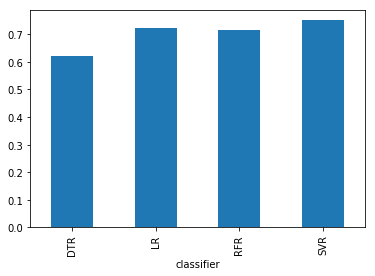

In [7]:
reg_df.groupby(['classifier'])['r2'].mean().plot.bar()

Overall mean R2 by classifier type

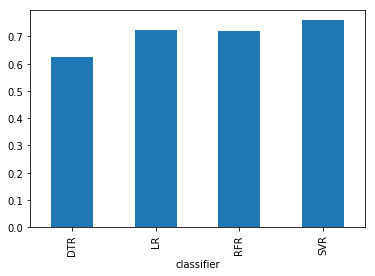

In [8]:
reg_df.groupby('classifier')['explained_variance'].mean().plot.bar()

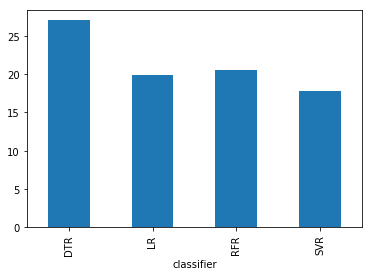

In [9]:
reg_df.groupby('classifier')['mean_squared_error'].mean().plot.bar()

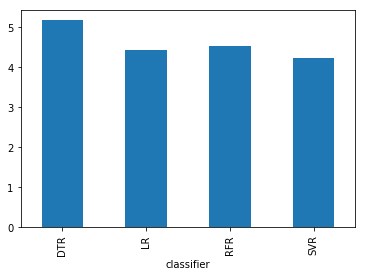

In [10]:
reg_df.groupby('classifier')['root_mean_squared_error'].mean().plot.bar()

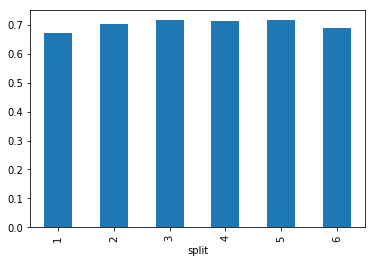

In [11]:
reg_df.groupby('split')['r2'].mean().plot.bar()

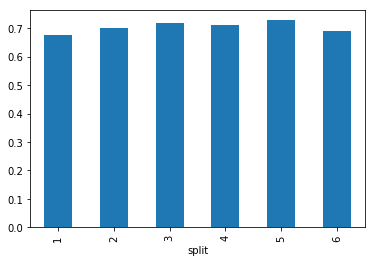

In [12]:
reg_df.groupby('split')['explained_variance'].mean().plot.bar()

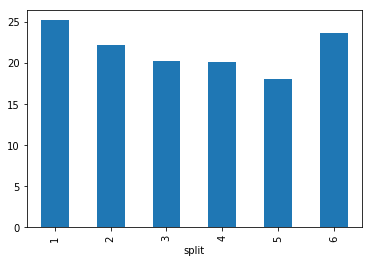

In [13]:
reg_df.groupby('split')['mean_squared_error'].mean().plot.bar()

In [14]:
reg_summary_plot = reg_summary_df
reg_summary_plot['label'] = reg_summary_df['classifier'] + '_'+ reg_summary_df['split'].apply(str)
reg_summary_plot.drop(['classifier','split'],axis=1,inplace=True)

Text(0, 0.5, 'R2 value')

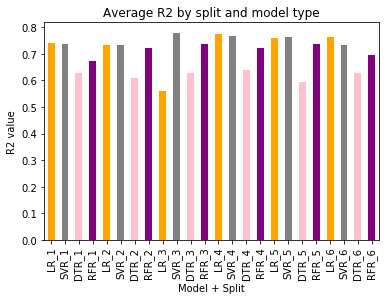

In [15]:
ax = reg_summary_plot['mean_r2'].plot.bar(rot=0, color=['orange', 'gray', 'pink', 'purple'])
plt.Axes.set_xticklabels(ax, reg_summary_plot['label'])
plt.xticks(rotation=90)
plt.title('Average R2 by split and model type')
plt.xlabel('Model + Split')
plt.ylabel('R2 value')

Text(0, 0.5, 'Explained Variance')

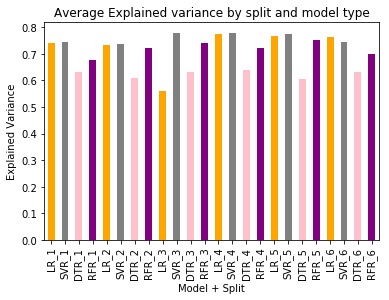

In [16]:
ax = reg_summary_plot['mean_explained_variance'].plot.bar(rot=0, color=['orange', 'gray', 'pink', 'purple'])
plt.Axes.set_xticklabels(ax, reg_summary_plot['label'])
plt.xticks(rotation=90)
plt.title('Average Explained variance by split and model type')
plt.xlabel('Model + Split')
plt.ylabel('Explained Variance')

Text(0, 0.5, 'Mean Squared Error')

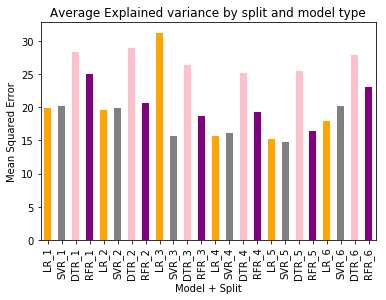

In [17]:
ax = reg_summary_plot['mean_mean_squared_error'].plot.bar(rot=0, color=['orange', 'gray', 'pink', 'purple'])
plt.Axes.set_xticklabels(ax, reg_summary_plot['label'])
plt.xticks(rotation=90)
plt.title('Average Explained variance by split and model type')
plt.xlabel('Model + Split')
plt.ylabel('Mean Squared Error')

Text(0, 0.5, 'Root Mean Squared Error')

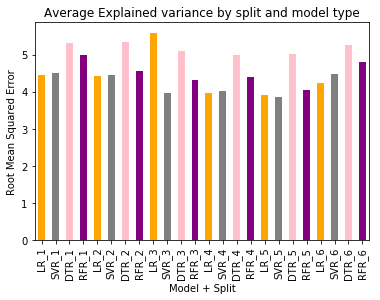

In [18]:
ax = reg_summary_plot['mean_RMSE'].plot.bar(rot=0, color=['orange', 'gray', 'pink', 'purple'])
plt.Axes.set_xticklabels(ax, reg_summary_plot['label'])
plt.xticks(rotation=90)
plt.title('Average Explained variance by split and model type')
plt.xlabel('Model + Split')
plt.ylabel('Root Mean Squared Error')

# Classification models

In [19]:
clf_summary_df = clf_df.drop(['Unnamed: 0','parameters'],axis=1)
clf_summary_df['mean_f1'] = clf_summary_df.groupby(['classifier','split','threshold'])['f1'].transform('mean')
clf_summary_df['mean_precision'] = clf_summary_df.groupby(['classifier','split','threshold'])['precision'].transform('mean')
clf_summary_df['mean_auc'] = clf_summary_df.groupby(['classifier','split','threshold'])['auc'].transform('mean')
clf_summary_df['mean_recall'] = clf_summary_df.groupby(['classifier','split','threshold'])['recall'].transform('mean')
clf_summary_df['mean_accuracy'] = clf_summary_df.groupby(['classifier','split','threshold'])['accuracy'].transform('mean')

In [20]:
clf_summary_df = clf_summary_df.drop(['f1','auc','accuracy','precision','recall'],axis=1)
clf_summary_df = clf_summary_df.drop_duplicates()

In [21]:
clf_summary_df.style.apply(
    find_best_model.highlight_max, color='darkorange', subset=['mean_f1', 'mean_accuracy',
                                                               'mean_precision','mean_recall','mean_auc'])


,classifier,split,threshold,mean_f1,mean_precision,mean_auc,mean_recall,mean_accuracy
0,LR,1,12,0.754848,0.851562,0.828468,0.677861,0.933757
1,LR,1,16,0.7657,0.744131,0.87027,0.788557,0.927395
2,LR,1,20,0.725427,0.635768,0.879422,0.844527,0.903817
12,KNN,1,12,0.630194,0.710938,0.762586,0.56592,0.900075
13,KNN,1,16,0.649758,0.631455,0.799996,0.669154,0.891467
14,KNN,1,20,0.642094,0.562734,0.822325,0.747512,0.874626
48,DT,1,12,0.648199,0.73125,0.772102,0.58209,0.90494
49,DT,1,16,0.656401,0.637911,0.804022,0.675995,0.893525
50,DT,1,20,0.627671,0.550094,0.812442,0.730721,0.869573
72,SVM,1,12,0.761773,0.859375,0.832128,0.68408,0.935629


In [22]:
#Looking just at precision at 16%

clf_summary_16 = clf_summary_df[clf_summary_df['threshold']==16]

In [23]:
clf_summary_16.style.apply(
    find_best_model.highlight_max, color='darkorange', subset=['mean_f1', 'mean_accuracy',
                                                               'mean_precision','mean_recall','mean_auc'])


,classifier,split,threshold,mean_f1,mean_precision,mean_auc,mean_recall,mean_accuracy
1,LR,1,16,0.7657,0.744131,0.87027,0.788557,0.927395
13,KNN,1,16,0.649758,0.631455,0.799996,0.669154,0.891467
49,DT,1,16,0.656401,0.637911,0.804022,0.675995,0.893525
73,SVM,1,16,0.758454,0.737089,0.865878,0.781095,0.92515
79,RF,1,16,0.760266,0.73885,0.866976,0.78296,0.925711
127,GB,1,16,0.694444,0.674883,0.82708,0.715174,0.905314
175,AB,1,16,0.647343,0.629108,0.798532,0.666667,0.890719
187,NB,1,16,0.613527,0.596244,0.778035,0.631841,0.88024
190,ET,1,16,0.738979,0.718163,0.854074,0.761039,0.919115
286,BC,1,16,0.729469,0.70892,0.848309,0.751244,0.916168


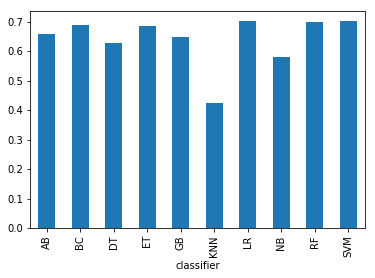

In [24]:
clf_df.groupby(['classifier'])['precision'].mean().plot.bar()

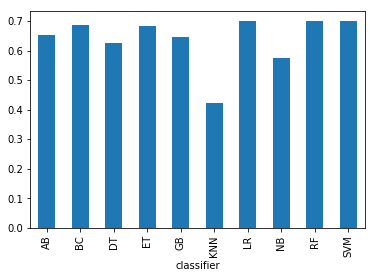

In [25]:
clf_16 = clf_df[clf_df['threshold']==16]
clf_16.groupby(['classifier'])['precision'].mean().plot.bar()

In [26]:
clf_summary_plot = clf_summary_16
clf_summary_plot['label'] = clf_summary_plot['classifier'] + '_'+ clf_summary_plot['split'].apply(str)+ '_'+ clf_summary_plot['threshold'].apply(str)
clf_summary_plot.drop(['threshold','classifier','split'],axis=1,inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Text(0, 0.5, 'Precision Value at 16%')

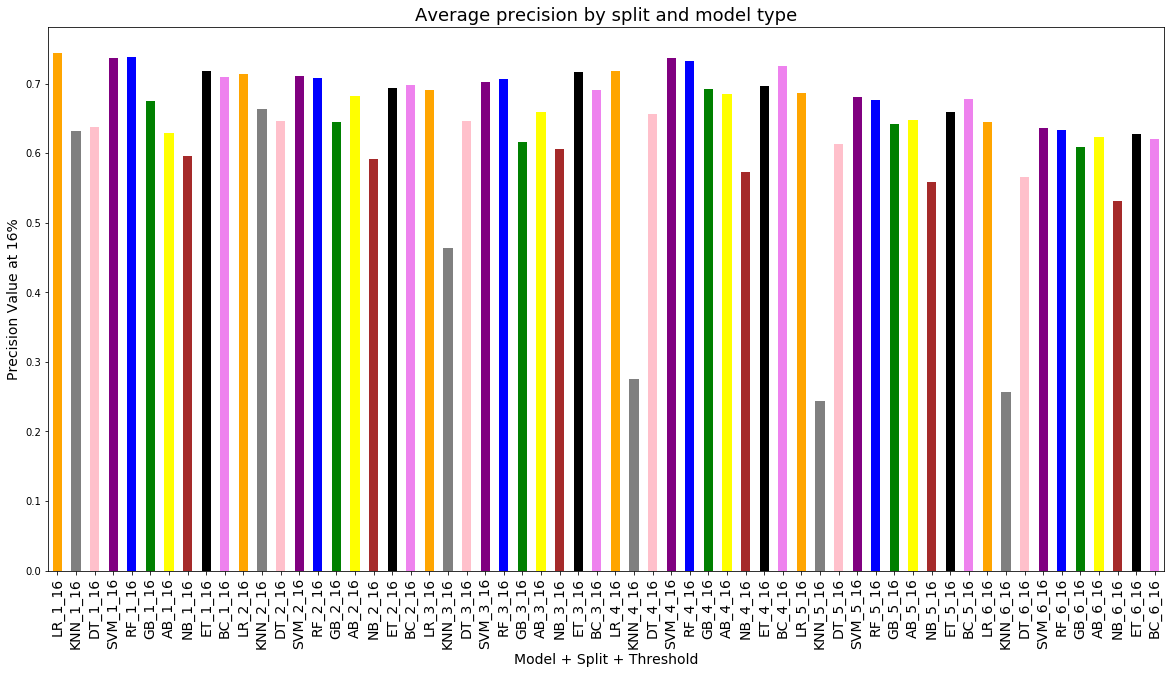

In [40]:
ax = clf_summary_plot['mean_precision'].plot.bar(rot=0, figsize=(20,10), color=['orange', 'gray', 'pink', 'purple',
                                                                               'blue','green','yellow','brown',
                                                                               'black','violet'])
plt.Axes.set_xticklabels(ax, clf_summary_plot['label'])
plt.xticks(rotation=90,fontsize=14)
plt.title('Average precision by split and model type',fontsize=18)
plt.xlabel('Model + Split + Threshold',fontsize=14)
plt.ylabel('Precision Value at 16%',fontsize=14)

Text(0, 0.5, 'Recall Value at 16%')

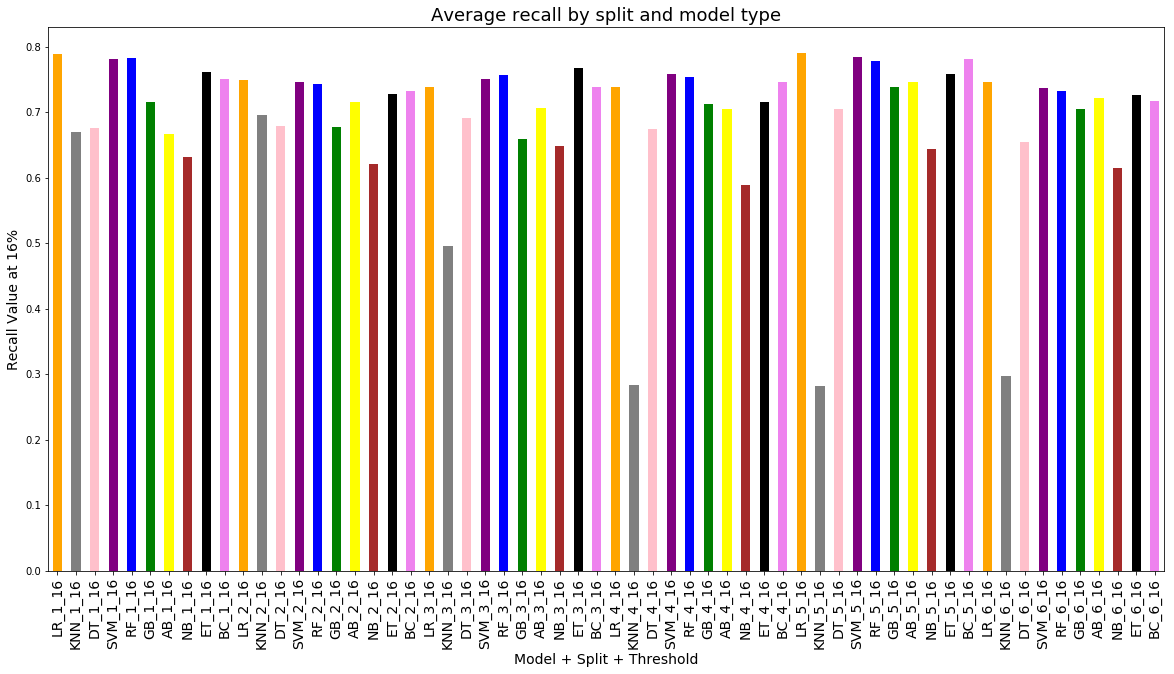

In [41]:
ax = clf_summary_plot['mean_recall'].plot.bar(rot=0, figsize=(20,10), color=['orange', 'gray', 'pink', 'purple',
                                                                               'blue','green','yellow','brown',
                                                                               'black','violet'])
plt.Axes.set_xticklabels(ax, clf_summary_plot['label'])
plt.xticks(rotation=90,fontsize=14)
plt.title('Average recall by split and model type',fontsize=18)
plt.xlabel('Model + Split + Threshold',fontsize=14)
plt.ylabel('Recall Value at 16%',fontsize=14)

Text(0.5, 0, 'F1 Value at 16%')

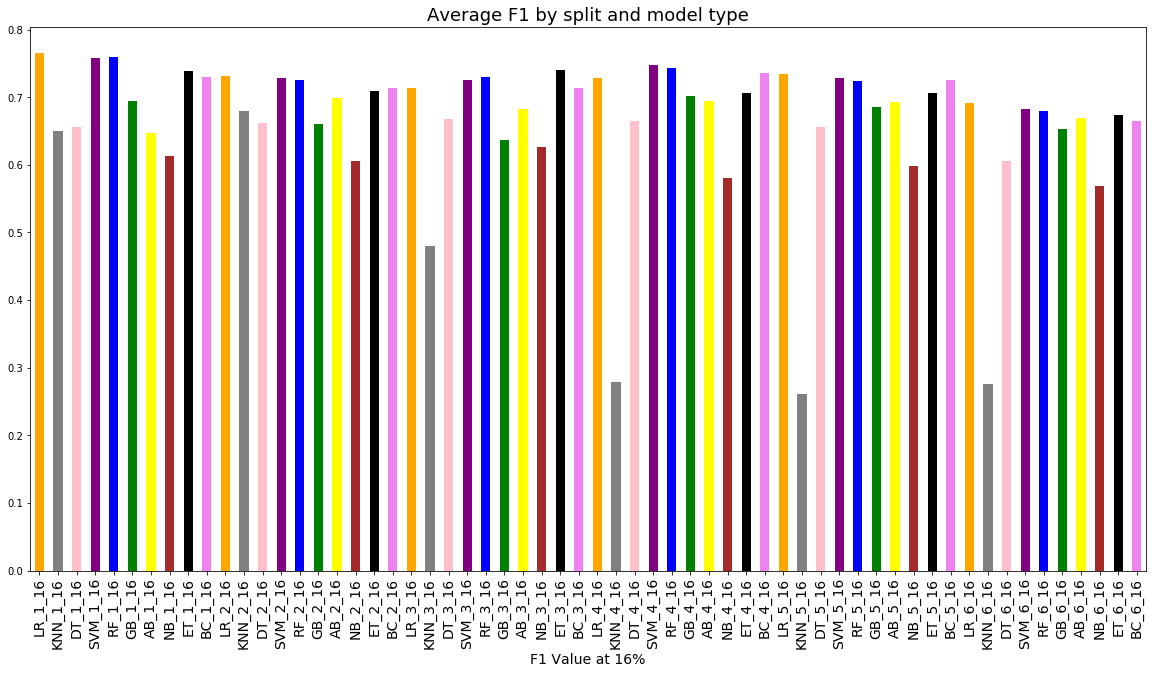

In [42]:
ax = clf_summary_plot['mean_f1'].plot.bar(rot=0, figsize=(20,10), color=['orange', 'gray', 'pink', 'purple',
                                                                               'blue','green','yellow','brown',
                                                                               'black','violet'])
plt.Axes.set_xticklabels(ax, clf_summary_plot['label'])
plt.xticks(rotation=90,fontsize=14)
plt.title('Average F1 by split and model type',fontsize=18)
plt.xlabel('F1 Value at 16%',fontsize=14)

Text(0, 0.5, 'Auc Value at 16%')

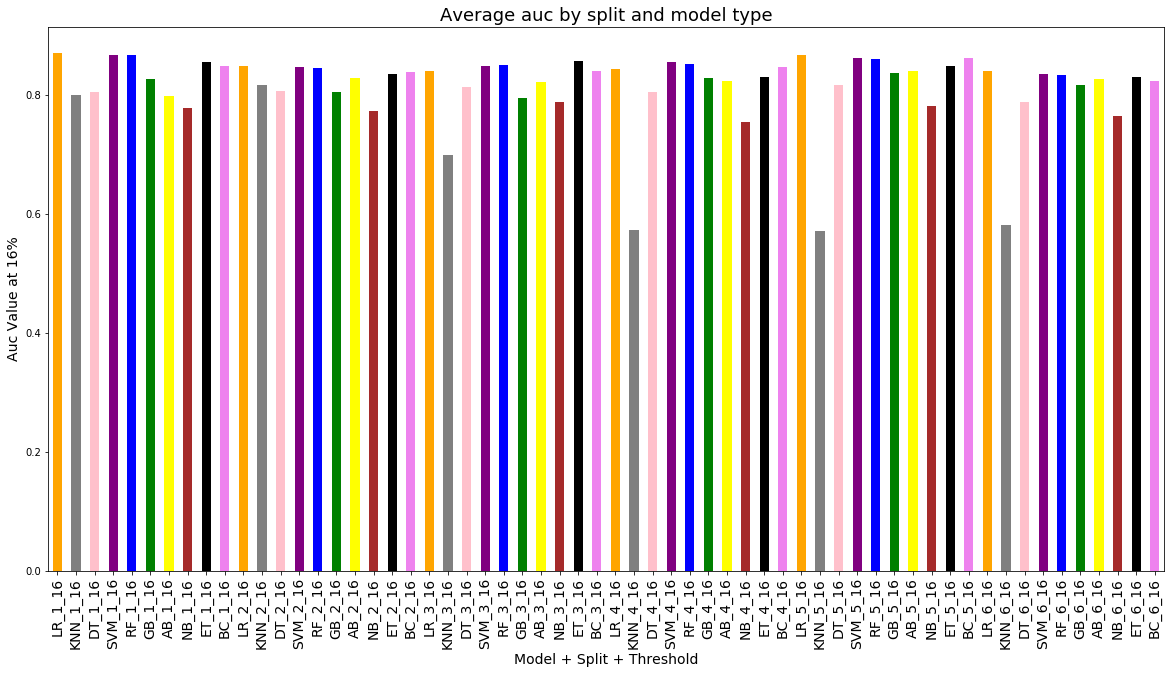

In [43]:
ax = clf_summary_plot['mean_auc'].plot.bar(rot=0, figsize=(20,10), color=['orange', 'gray', 'pink', 'purple',
                                                                               'blue','green','yellow','brown',
                                                                               'black','violet'])
plt.Axes.set_xticklabels(ax, clf_summary_plot['label'])
plt.xticks(rotation=90,fontsize=14)
plt.title('Average auc by split and model type',fontsize=18)
plt.xlabel('Model + Split + Threshold',fontsize=14)
plt.ylabel('Auc Value at 16%',fontsize=14)

Text(0, 0.5, 'Accuracy Value at 16%')

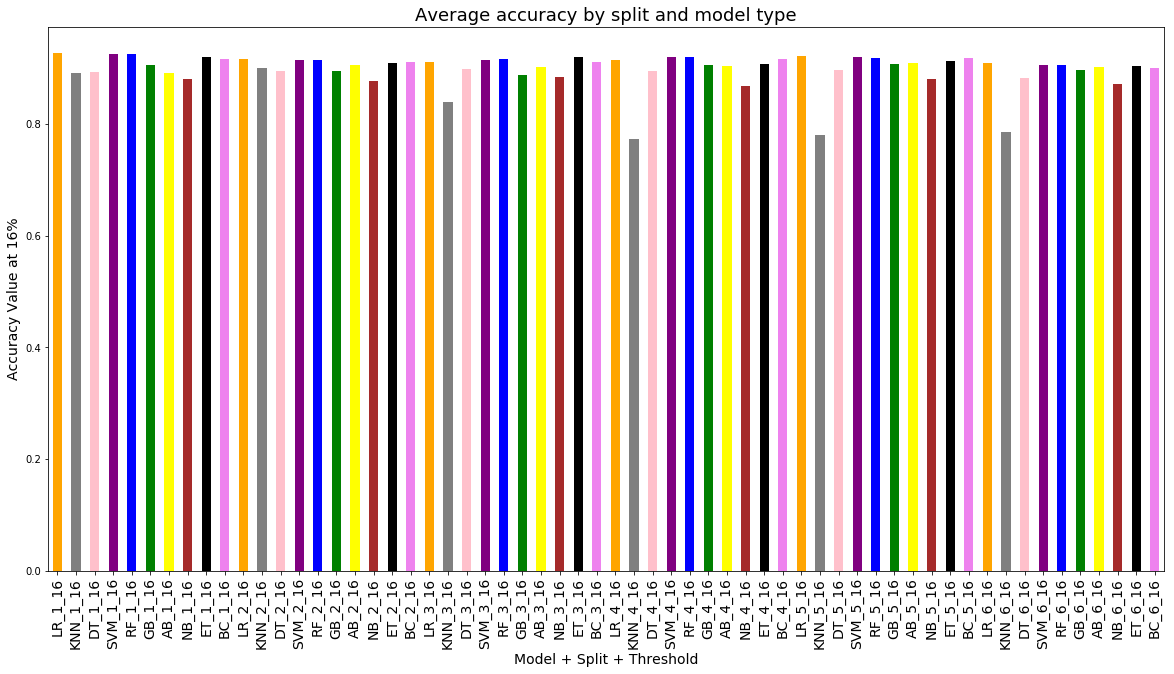

In [44]:
ax = clf_summary_plot['mean_accuracy'].plot.bar(rot=0, figsize=(20,10), color=['orange', 'gray', 'pink', 'purple',
                                                                               'blue','green','yellow','brown',
                                                                               'black','violet'])
plt.Axes.set_xticklabels(ax, clf_summary_plot['label'])
plt.xticks(rotation=90,fontsize=14)
plt.title('Average accuracy by split and model type',fontsize=18)
plt.xlabel('Model + Split + Threshold',fontsize=14)
plt.ylabel('Accuracy Value at 16%',fontsize=14)